In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'Rank']

dSlow = readAndProcess('../Data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)
p = percolator(dSlow, idCol, excluded, suppressLog = True)

file read
strings converted to numbers
q-values estimated
ranks computed


AUC for Non-cross-linked PSMs: 50.26382605638547
AUC for Cross-linked PSMs: 238.43553538671125


[50.26382605638547, 238.43553538671125]

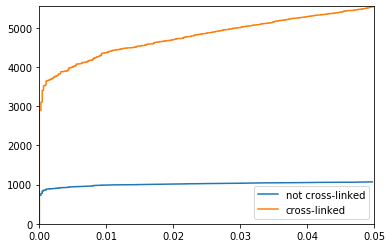

In [2]:
evalXL(p)